---
# 5주차

## **Class 오버라이딩**
아래의 클래스를 상속받는 Dog 클래스를 생성하고, speak 메서드를 오버라이딩하여 Dog 클래스의 인스턴스가 Woof! 를 반환하도록 작성하시오.

###풀이

In [ ]:
class Animal:
    def speak(self):
        return "Animal speaks"

class Dog(Animal):
    def speak(self):
        return 'Woof!'

dog = Dog()
print(dog.speak())

## **정규표현식과 이터레이터를 활용한 단어 필터링<br>**
문제: 텍스트 파일을 읽어 특정 패턴(예: ing로 끝나는 단어)을 찾고, 이를 이터레이터를 사용하여 한 줄씩 반환하는 프로그램을 작성하시오.

* 클래스 WordFilter를 작성하여 __iter__()를 구현하고 이터레이터를 활용
* re 모듈을 이용하여 정규표현식으로 단어 필터링

In [ ]:
with open('./data.txt', 'w') as f:
    data = '''This is a simple testing file.
We are running and jumping in the park.
Walking and swimming are great exercises.
The weather is shining brightly today.
Enjoying a good book is relaxing.
They are discussing an interesting topic.
Coding and debugging are essential skills for developers.
Traveling around the world is a dream for many.
Some people prefer hiking while others enjoy fishing.
He was whispering something before leaving the room.'''
    f.write(data)

###풀이

In [ ]:
import re

class WordFilter:
  def __init__(self, path):
    # 초기화
    self.position = 0
    self.datas = []

    # txt 파일 데이터 가져오기
    with open(path, 'r') as f:
      self.words = f.readlines()

    # ing로 끝나는 단어 필터링
    p = re.compile('\w+ing')
    for word in self.words:
      self.datas.extend(p.findall(word))

  def __iter__(self):
    return self

  def __next__(self):
    if len(self.datas) <= self.position:
      raise StopIteration
    result = self.datas[self.position]
    self.position += 1
    return result

if __name__ == '__main__':
  answer = WordFilter('./data.txt')
  for i in answer:
    print(i)

testing
running
jumping
Walking
swimming
shining
Enjoying
relaxing
discussing
interesting
Coding
debugging
Traveling
hiking
fishing
whispering
something
leaving


In [ ]:
import re
p = re.compile('-[0-9]*')
print(p.match('-1'))

<re.Match object; span=(0, 2), match='-1'>


###GPT 풀이

In [ ]:
import re
import tkinter as tk
from tkinter import filedialog

class WordFilter:
    def __init__(self, filepath, pattern=r"\b\w+ing\b"):
        self.filepath = filepath
        self.pattern = pattern

    def __iter__(self):
        with open(self.filepath, "r", encoding="utf-8") as file:
            for line in file:
                words = re.findall(self.pattern, line)
                for word in words:
                    yield word

def select_file():
    filepath = filedialog.askopenfilename()
    if not filepath:
        return

    word_filter = WordFilter(filepath)
    result_text.delete("1.0", tk.END)

    for word in word_filter:
        result_text.insert(tk.END, word + "\n")

# GUI
root = tk.Tk()
root.title("단어 필터링")

btn = tk.Button(root, text="파일 선택", command=select_file)
btn.pack()

result_text = tk.Text(root, height=10, width=50)
result_text.pack()

root.mainloop()

## **프로그래머스: 코딩테스트 연습/ 스택&큐/ 프로세스 제출내역(프린터)**

```
운영체제의 역할 중 하나는 컴퓨터 시스템의 자원을 효율적으로 관리하는 것입니다.
이 문제에서는 운영체제가 다음 규칙에 따라 프로세스를 관리할 경우 특정 프로세스가 몇 번째로 실행되는지 알아내면 됩니다.

1. 실행 대기 큐(Queue)에서 대기중인 프로세스 하나를 꺼냅니다.
2. 큐에 대기중인 프로세스 중 우선순위가 더 높은 프로세스가 있다면 방금 꺼낸 프로세스를 다시 큐에 넣습니다.
3. 만약 그런 프로세스가 없다면 방금 꺼낸 프로세스를 실행합니다.
  3.1 한 번 실행한 프로세스는 다시 큐에 넣지 않고 그대로 종료됩니다.


예를 들어 프로세스 4개 [A, B, C, D]가 순서대로 실행 대기 큐에 들어있고, 우선순위가 [2, 1, 3, 2]라면 [C, D, A, B] 순으로 실행하게 됩니다.

현재 실행 대기 큐(Queue)에 있는 프로세스의 중요도가 순서대로 담긴 배열 priorities와,
몇 번째로 실행되는지 알고싶은 프로세스의 위치를 알려주는 location이 매개변수로 주어질 때,
해당 프로세스가 몇 번째로 실행되는지 return 하도록 solution 함수를 작성해주세요.

제한사항
priorities의 길이는 1 이상 100 이하입니다.
priorities의 원소는 1 이상 9 이하의 정수입니다.
priorities의 원소는 우선순위를 나타내며 숫자가 클 수록 우선순위가 높습니다.
location은 0 이상 (대기 큐에 있는 프로세스 수 - 1) 이하의 값을 가집니다.
priorities의 가장 앞에 있으면 0, 두 번째에 있으면 1 … 과 같이 표현합니다.

입출력 예
priorities	           location	         return
[2, 1, 3, 2]	              2	                1
[1, 1, 9, 1, 1, 1]	      0	                5


입출력 예 설명
예제 #1
문제에 나온 예와 같습니다.

예제 #2
6개의 프로세스 [A, B, C, D, E, F]가 대기 큐에 있고 중요도가 [1, 1, 9, 1, 1, 1] 이므로 [C, D, E, F, A, B] 순으로 실행됩니다. 따라서 A는 5번째로 실행됩니다.

```
<출처: https://school.programmers.co.kr/learn/courses/30/lessons/42587?language=python3>


---
# 7주차

## **코딩테스트 미로 탈출 문제(DFS, BFS)**
입력 조건:
- 첫째 줄에 두 정수 N, M(4<=N, M<=200)이 주어집니다. 다음 N개의 줄에는 각각 M개의 정수(0 혹은 1)로 미로의 정보가 주어집니다. 각각의 수들은 공백 없이 붙어서 입력으로 제시됩니다. 또한 시작칸과 마지막 칸은 항상 1입니다.

출력 조건:
- 첫째 줄에 최소 이동 칸의 개수를 출력합니다.

입력 예시:<br>
5 6<br>
101010<br>
111111<br>
000001<br>
111111<br>
111111

출력 예시: 10

넘파이 사용

랜덤 맵 생성

In [ ]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

end = [5,6]
map_data = np.random.randint(0,2,end)
map_data.astype(int)

array([[1, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 1]])

In [ ]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

class Maze:
  def __init__(self):
    while True:
      try:
        self.end = [int(i) for i in input('정수 N, M 입력: ').split()]
        if 4 <= self.end[0] <= 200 or 4 <= self.end[1] <= 200:
          break
        print('정수이며 4 <= N, M <= 200 입니다!')
        raise ValueError()

      except ValueError:
        pass

    while True:
      try:
        self.map_data = []
        mode = input('수동 맵: H   랜덤 맵: R   \n')
        if mode == 'H':
          for i in range(self.end[0]):
            data =input(f'{i}번째 데이터를 입력: ')
            if len(data) != self.end[1]:
              print(f'입력 길이는 {self.end[1]}여야 합니다!')
              raise ValueError()
            self.map_data.append([int(i) for i in data])

        else:
          self.map_data = np.random.randint(0,2,self.end)
          self.map_data.astype(int)
          self.map_data[0][0] = 1
          self.map_data[self.end[0] - 1][self.end[1] - 1] = 1

        self.map_path = self.map_data
        self.title = 'Map Data'

        break

      except ValueError:
        pass

  def DFS(self):
    self.stack = []
    self.visited = []

    self.stack.append([0, 0])
    while self.stack:
      self.node = self.stack.pop()

      # 방문 노드 확인
      if self.node in self.visited:
        continue

      # 방문 리스트에 노드 추가 및 다음 경로 탐색
      self.visited.append(self.node)
      self.search_node()
      self.stack.extend(reversed(self.path_nodes))

      self.path_count()

    self.title = f'DFS: {self.map_path[self.end[0] - 1][self.end[1] - 1]}'

    if [self.end[0] - 1, self.end[1] - 1] in self.visited:
      return self.map_path[self.end[0] - 1][self.end[1] - 1]
    else:
      return -1

  def BFS(self):
    self.queue = deque()
    self.visited = []

    self.queue.append([0, 0])
    while self.queue:
      self.node = self.queue.popleft()

      # 방문 노드 확인
      if self.node in self.visited:
        continue

      # 방문 리스트에 노드 추가 및 다음 경로 탐색
      self.visited.append(self.node)
      self.search_node()
      self.queue.extend(self.path_nodes)

      self.path_count()

    self.title = f'BFS: {self.map_path[self.end[0] - 1][self.end[1] - 1]}'

    if [self.end[0] - 1, self.end[1] - 1] in self.visited:
      return self.map_path[self.end[0] - 1][self.end[1] - 1]
    else:
      return -1

  def search_node(self):
    x, y = self.node
    near_nodes = [[x+1, y], [x, y+1], [x-1, y], [x, y-1]]
    self.path_nodes = []

    if self.node == [self.end[0] - 1, self.end[1] - 1]:
      return self.path_nodes

    for near_node in near_nodes:
      x, y = near_node
      xlimit = [-1 , self.end[0]]
      ylimit = [-1 , self.end[1]]
      if x in xlimit or y in ylimit:
        continue
      elif self.map_path[x][y] != 0:
        self.path_nodes.append(near_node)
    return self.path_nodes

  def path_count(self):
    x, y = self.node
    xed, yed = self.end
    for path_node in self.path_nodes:
        if path_node in self.visited:
          continue
        elif path_node == [xed - 1, yed - 1]:
          if self.map_path[x][y] < self.map_path[xed - 1][yed - 1]:
            continue
        self.map_path[path_node[0]][path_node[1]] = self.map_path[x][y] + 1
    return self.map_path

  def NP_DFS(self):
    self.stack = []
    self.visited = []

    x, y = self.end
    self.map_path = np.zeros((x+2,y+2))
    self.map_path[1:x+1, 1:y+1] = self.map_data

    self.stack.append([1, 1])
    while self.stack:
      self.node = self.stack.pop()

      # 방문 노드 확인
      if self.node in self.visited:
        continue

      # 방문 리스트에 노드 추가 및 다음 경로 탐색
      self.visited.append(self.node)
      self.np_search_node()
      self.stack.extend(reversed(self.path_nodes))

      self.np_path_count()

    self.title = f'DFS: {self.map_path[x, y]}'

    self.map_path = self.map_path[1:x+1, 1:y+1]

    if self.end in self.visited:
      return self.map_path[x - 1, y - 1]
    else:
      return -1

  def NP_BFS(self):
    self.queue = deque()
    self.visited = []

    x, y = self.end
    self.map_path = np.zeros((x+2,y+2))
    self.map_path[1:x+1, 1:y+1] = self.map_data

    self.queue.append([1, 1])
    while self.queue:
      self.node = self.queue.popleft()

      # 방문 노드 확인
      if self.node in self.visited:
        continue

      # 방문 리스트에 노드 추가 및 다음 경로 탐색
      self.visited.append(self.node)
      self.np_search_node()
      self.queue.extend(self.path_nodes)

      self.np_path_count()

    self.title = f'BFS: {self.map_path[x, y]}'

    self.map_path = self.map_path[1:x+1, 1:y+1]

    if self.end in self.visited:
      return self.map_path[x - 1, y - 1]
    else:
      return -1

  def np_search_node(self):
    x, y = self.node
    near_nodes = [[x+1, y], [x, y+1], [x-1, y], [x, y-1]]
    self.path_nodes = []

    if self.node == self.end:
      return self.path_nodes

    for near_node in near_nodes:
      x, y = near_node
      if self.map_path[x, y] != 0:
        self.path_nodes.append(near_node)
    return self.path_nodes

  def np_path_count(self):
    x, y = self.node
    xed, yed = self.end
    for path_node in self.path_nodes:
        if path_node in self.visited:
          continue
        elif path_node == self.end:
          if self.map_path[x, y] < self.map_path[xed, yed]:
            continue
        self.map_path[path_node[0], path_node[1]] = self.map_path[x, y] + 1
    return self.map_path

  def show(self, data, color):
    plt.title(self.title)
    plt.imshow(data, cmap=color, interpolation='nearest')
    plt.show()

<img width="700" alt="image" src="https://wikidocs.net/images/page/141538/set_colormap_00.png">

- gray()
- bone()
- pink()
- spring()
- summer()
- autumn()
- winter()
- cool()
- hot()
- copper()

- viridis()
- plasma()
- inferno()
- magma()

- flag()
- prism()

- jet()
- nipy_spectral()
- hsv()

In [ ]:
a = Maze()

정수 N, M 입력: 5 6
수동 맵: H   랜덤 맵: R   
R


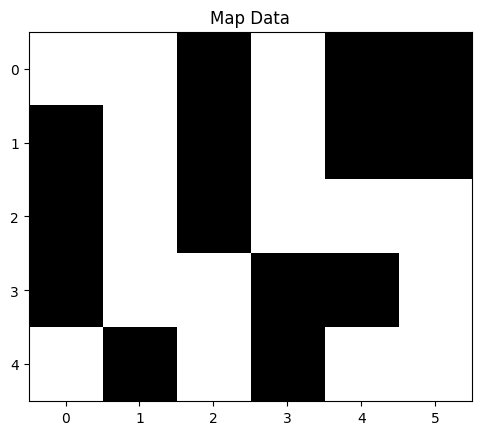

In [ ]:
a.show(a.map_data, 'gray')

DFS: -1


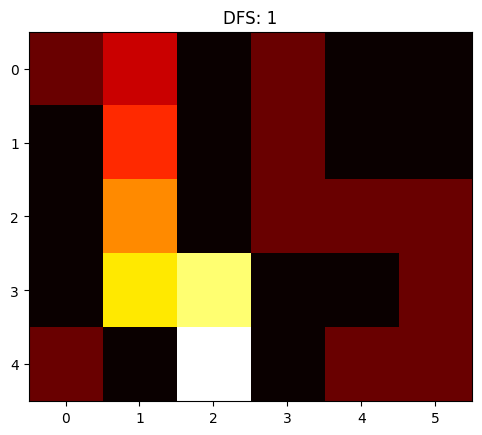

In [ ]:
print(f'DFS: {a.DFS()}')
a.show(a.map_path, 'hot')

BFS: -1


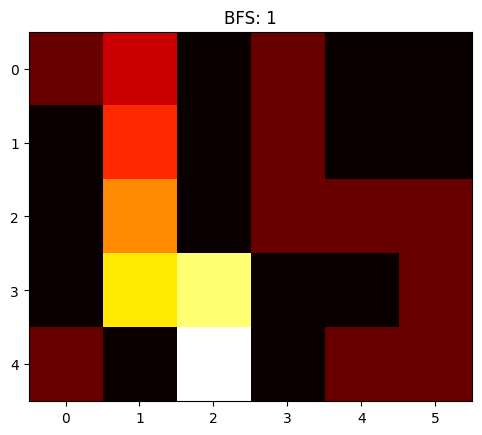

In [ ]:
print(f'BFS: {a.BFS()}')
a.show(a.map_path, 'hot')

NP_DFS: -1


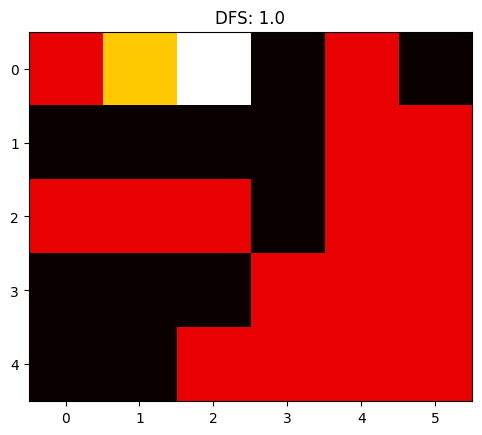

In [ ]:
print(f'NP_DFS: {a.NP_DFS()}')
a.show(a.map_path, 'hot')

NP_BFS: -1


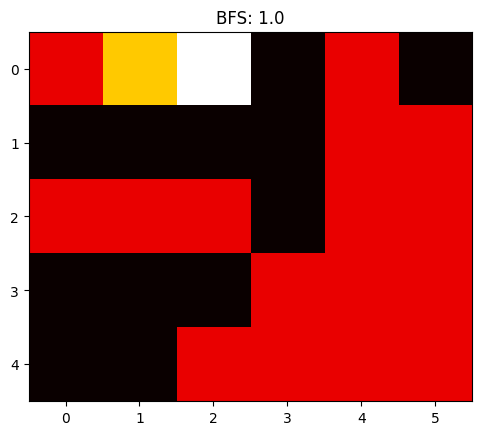

In [ ]:
print(f'NP_BFS: {a.NP_BFS()}')
a.show(a.map_path, 'hot')